In [1]:
import numpy as np 
import pandas as pd 

df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

print(df_train.columns)
print("shape: ", df_train.shape)

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')
shape:  (136429, 14)


# Analysing the dataset

In [2]:
print("non-zero:", np.count_nonzero(df_train["TWF"]), "\nunique elements:", df_train["TWF"].unique())
print("non-zero:", np.count_nonzero(df_train["HDF"]), "\nunique elements:", df_train["HDF"].unique())
print("non-zero:", np.count_nonzero(df_train["PWF"]), "\nunique elements:", df_train["PWF"].unique())
print("non-zero:", np.count_nonzero(df_train["OSF"]), "\nunique elements:", df_train["OSF"].unique())
print("non-zero:", np.count_nonzero(df_train["RNF"]), "\nunique elements:", df_train["RNF"].unique())

non-zero: 212 
unique elements: [0 1]
non-zero: 704 
unique elements: [0 1]
non-zero: 327 
unique elements: [0 1]
non-zero: 540 
unique elements: [0 1]
non-zero: 308 
unique elements: [0 1]


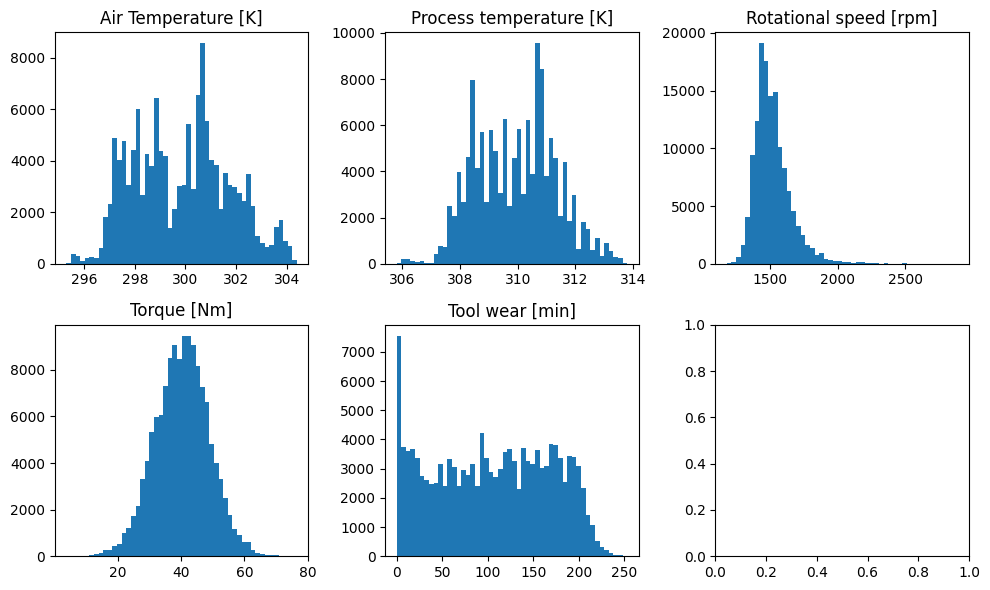

In [3]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,6))

axes[0, 0].hist(df_train["Air temperature [K]"], bins=50)
axes[0, 1].hist(df_train["Process temperature [K]"], bins=50)
axes[0, 2].hist(df_train["Rotational speed [rpm]"], bins=50)
axes[1, 0].hist(df_train["Torque [Nm]"], bins=50)
axes[1, 1].hist(df_train["Tool wear [min]"], bins=50)

axes[0, 0].set_title("Air Temperature [K]")
axes[0, 1].set_title("Process temperature [K]")
axes[0, 2].set_title("Rotational speed [rpm]")
axes[1, 0].set_title("Torque [Nm]")
axes[1, 1].set_title("Tool wear [min]")

plt.tight_layout()
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

x_train = df_train.copy()
x_train.drop('id', axis=1, inplace=True)
x_train.drop('Product ID', axis=1, inplace=True)  # deal with this later
x_train.drop('Machine failure', axis=1, inplace=True)
y_train = df_train["Machine failure"]

x_test = df_test.copy()
x_test.drop('id', axis=1, inplace=True)
x_test.drop('Product ID', axis=1, inplace=True)  # deal with this later

# Standardization
columns_to_standardize = ['Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]']

scaler = StandardScaler()

x_train[columns_to_standardize] = scaler.fit_transform(x_train[columns_to_standardize])
x_test[columns_to_standardize] = scaler.fit_transform(x_test[columns_to_standardize])

x_train = np.array(x_train)
y_train = np.array(y_train, dtype=np.float32)
x_test = np.array(x_test)

lm_column = 0
x_train[:, lm_column] = np.where(x_train[:, lm_column] == 'L', 0, 1)
x_test[:, lm_column] = np.where(x_test[:, lm_column] == 'L', 0, 1)

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

print(x_train[:5, :])

[[ 0.          0.3958803  -0.24623038  0.54541594 -0.49971116  0.55641687
   0.          0.          0.          0.          0.        ]
 [ 1.          1.4698555   1.5586048   1.7203082  -1.3230277   1.4944327
   0.          0.          0.          0.          0.        ]
 [ 0.         -0.30220363 -1.0403578   2.051873   -1.6288309  -1.2414467
   0.          0.          0.          0.          0.        ]
 [ 0.          0.61067533  0.6922839   0.0264451   0.46474534  1.4475319
   0.          0.          0.          0.          0.        ]
 [ 1.         -1.0002875  -0.67939085  0.8697727  -0.5820428  -1.1007444
   0.          0.          0.          0.          0.        ]]


In [5]:
print(x_train.shape)

(136429, 11)


In [6]:
import tensorflow as tf
from tensorflow import keras

num_features = x_train.shape[1] 

model = keras.Sequential([
    keras.layers.Dense(11, activation='relu', input_shape=(num_features,)),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
4264/4264 [==============================] - 8s 2ms/step - loss: 0.0786 - accuracy: 0.9837
Epoch 2/5
4264/4264 [==============================] - 8s 2ms/step - loss: 0.0233 - accuracy: 0.9960
Epoch 3/5
4264/4264 [==============================] - 9s 2ms/step - loss: 0.0223 - accuracy: 0.9961
Epoch 4/5
4264/4264 [==============================] - 9s 2ms/step - loss: 0.0221 - accuracy: 0.9962
Epoch 5/5
4264/4264 [==============================] - 9s 2ms/step - loss: 0.0220 - accuracy: 0.9962


In [7]:
predictions = model.predict(x_test)

2843/2843 [==============================] - 5s 2ms/step


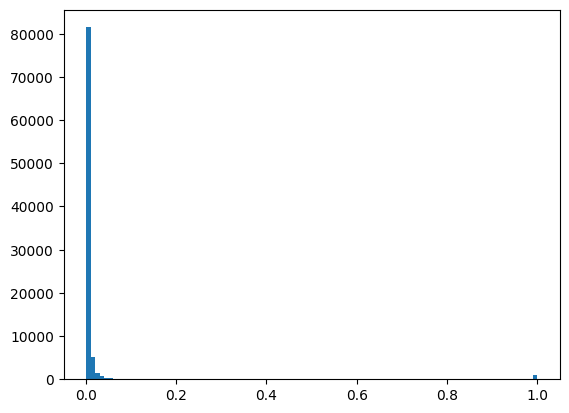

In [8]:
plt.hist(predictions, bins=100)
plt.show()

In [9]:
print("y_train")
print(np.count_nonzero(y_train), "of", y_train.shape[0], "===", np.count_nonzero(y_train) / y_train.shape[0])

print("predictions")
print(np.count_nonzero(predictions > 0.5), "of", predictions.shape[0], "===", np.count_nonzero(predictions > 0.5) / predictions.shape[0])

predictions

y_train
2148 of 136429 === 0.01574445315878589
predictions
1104 of 90954 === 0.012138003826109902


array([[0.00138728],
       [0.0012188 ],
       [0.00137112],
       ...,
       [0.00308825],
       [0.00110956],
       [0.00085638]], dtype=float32)

In [10]:
indices = np.array(df_test["id"], dtype=int).reshape(-1, 1)

submission = np.hstack((indices, predictions))

submission_df = pd.DataFrame(submission, columns=['id', 'Machine failure'])
submission_df['id'] = submission_df['id'].astype(int)  # Convert "id" column to integer
submission_df.to_csv("submissions/supervised_learning.csv", index=False)

In [11]:
indices = np.array(df_test["id"], dtype=int).reshape(-1, 1)
predictions = np.where(predictions < 10, 0, 1)
submission = np.hstack((indices, predictions))

submission_df = pd.DataFrame(submission, columns=['id', 'Machine failure'])
submission_df['id'] = submission_df['id'].astype(int)  # Convert "id" column to integer
submission_df.to_csv("submissions/troll.csv", index=False)